In [19]:
import load_mnist as lm
dataset = lm.load_mnist()

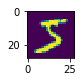

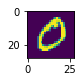

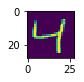

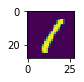

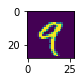

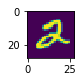

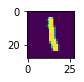

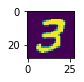

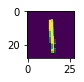

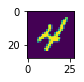

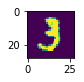

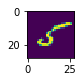

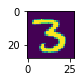

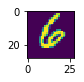

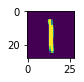

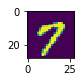

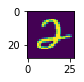

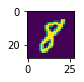

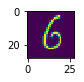

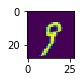

In [20]:
import matplotlib.pyplot as plt

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(dataset['x_train'][i,:].reshape(28,28))
    
    plt.show()

In [21]:
import numpy as np
import neuralnet as nl
import load_mnist

In [22]:
dataset = load_mnist.load_mnist()
X_train = dataset["x_train"]
t_train = dataset["t_train"]
X_test = dataset["x_test"]
t_test = dataset["t_test"]

In [23]:
weight_list, bias_list = nl.make_params([784, 100, 10])

In [24]:
train_time = 10000  # 何回学習するか指定
batch_size = 1000  # 1回の学習でいくつのデータを学習するかを指定

In [25]:
# 精度と損失がどれだけ変動したかを記録する配列を作る
total_acc_list = []
total_loss_list = []

In [26]:
for i in range(train_time):
    # 0～59999でランダムな整数をbatch_size分だけ発生させる
    ra = np.random.randint(60000, size=batch_size)
    # ここでパラメータの更新を行う
    # etaはどれぐらいの割合でパラメータを更新するかを決める
    # ここではeta=2.0とする
    # 実際は試行錯誤して値を決める
    x_batch, t_batch = X_train[ra,:], t_train[ra,:]
    weight_list, bias_list = nl.update(x_batch, weight_list, bias_list, t_batch, eta=2.0)
    # 5回ごとにどれぐらい学習できているかを確かめる
    if (i+1)%100 == 0:
        acc_list = []
        loss_list = []
        for k in range(10000//batch_size):  #  整数除算
            x_batch, t_batch = X_test[k*batch_size:(k+1)*batch_size, :], t_test[k*batch_size:(k+1)*batch_size, :]
            acc_val = nl.accuracy(x_batch, weight_list, bias_list, t_batch)
            loss_val = nl.loss(x_batch, weight_list, bias_list, t_batch)
            acc_list.append(acc_val)
            loss_list.append(loss_val)
        acc = np.mean(acc_list)
        loss = np.mean(loss_list)
        total_acc_list.append(acc)
        total_loss_list.append(loss)
        print("Time: %d, Accuracy: %f, Loss: %f"%(i+1, acc, loss))

Time: 100, Accuracy: 0.352000, Loss: 0.410060
Time: 200, Accuracy: 0.525400, Loss: 0.304928
Time: 300, Accuracy: 0.648100, Loss: 0.238889
Time: 400, Accuracy: 0.718400, Loss: 0.196198
Time: 500, Accuracy: 0.757000, Loss: 0.172947
Time: 600, Accuracy: 0.782900, Loss: 0.157040
Time: 700, Accuracy: 0.796300, Loss: 0.146062
Time: 800, Accuracy: 0.811600, Loss: 0.136690
Time: 900, Accuracy: 0.815200, Loss: 0.131415
Time: 1000, Accuracy: 0.827300, Loss: 0.124362
Time: 1100, Accuracy: 0.831400, Loss: 0.120484
Time: 1200, Accuracy: 0.834100, Loss: 0.118404
Time: 1300, Accuracy: 0.845000, Loss: 0.112317
Time: 1400, Accuracy: 0.849100, Loss: 0.109613
Time: 1500, Accuracy: 0.853400, Loss: 0.106537
Time: 1600, Accuracy: 0.855100, Loss: 0.104345
Time: 1700, Accuracy: 0.862200, Loss: 0.101860
Time: 1800, Accuracy: 0.864300, Loss: 0.100362
Time: 1900, Accuracy: 0.866700, Loss: 0.097855
Time: 2000, Accuracy: 0.867500, Loss: 0.097274
Time: 2100, Accuracy: 0.870900, Loss: 0.093873
Time: 2200, Accuracy: 

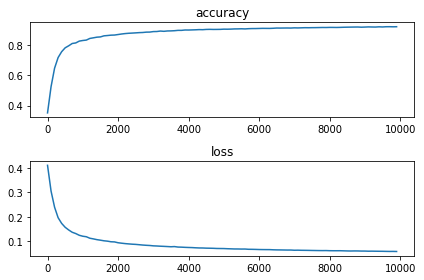

In [27]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(np.arange(0, train_time, 100), total_acc_list)
plt.title("accuracy")
plt.subplot(212)
plt.plot(np.arange(0, train_time, 100), total_loss_list)
plt.title("loss")
plt.tight_layout()
plt.show()